In [2]:
import numpy as np
import pandas as pd
import warnings, os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

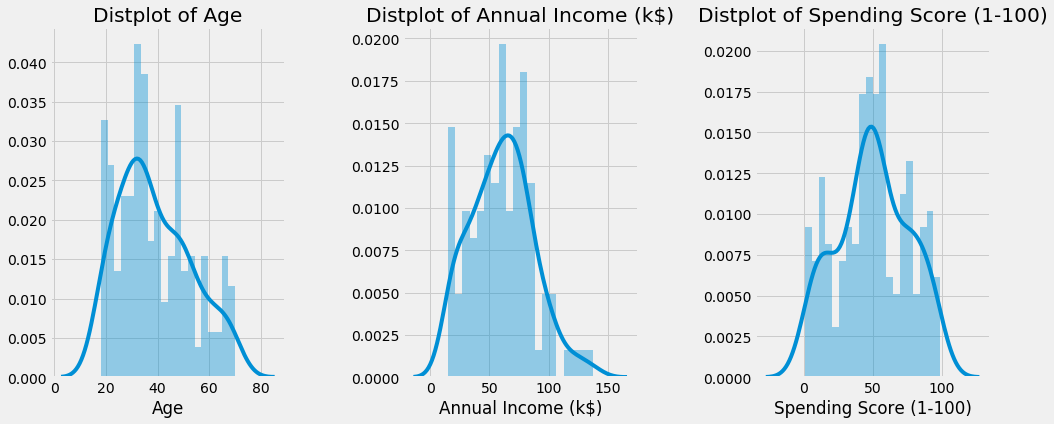

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = .5, wspace = .5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

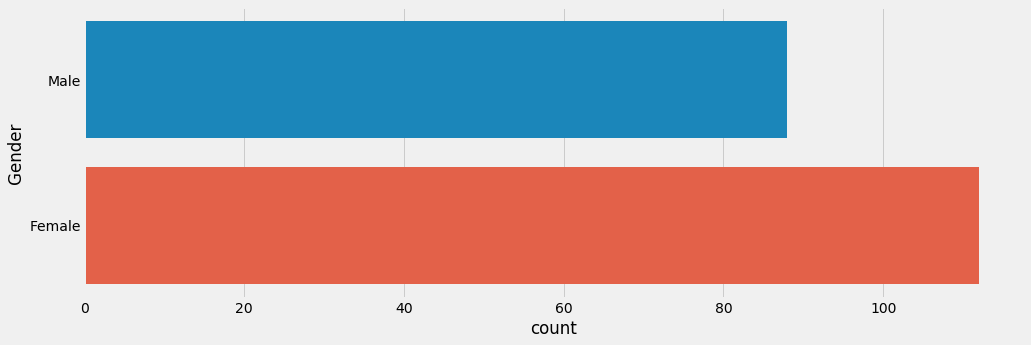

In [12]:
plt.figure(figsize = (15,5))
sns.countplot(y = 'Gender', data = df)
plt.show()

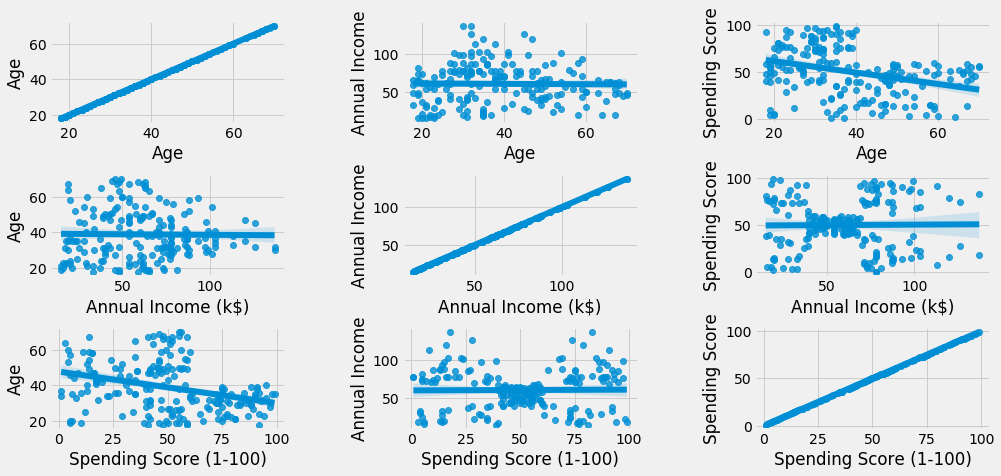

In [24]:
plt.figure(figsize = (15,7))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = .5, wspace = .5)
        sns.regplot( x=x,y=y,data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

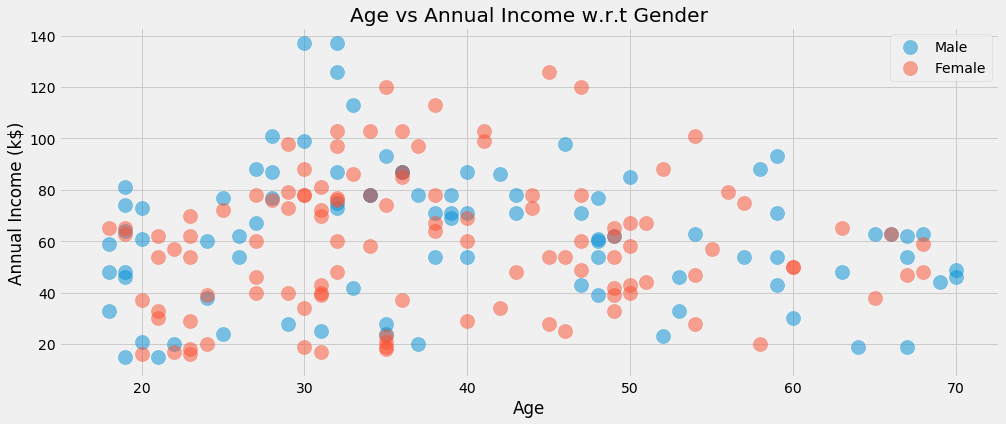

In [26]:
plt.figure(figsize = (15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = df[df['Gender'] == gender], s = 200, alpha = .5, label = gender)
    plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
    plt.title('Age vs Annual Income w.r.t Gender')
    plt.legend()
plt.show()

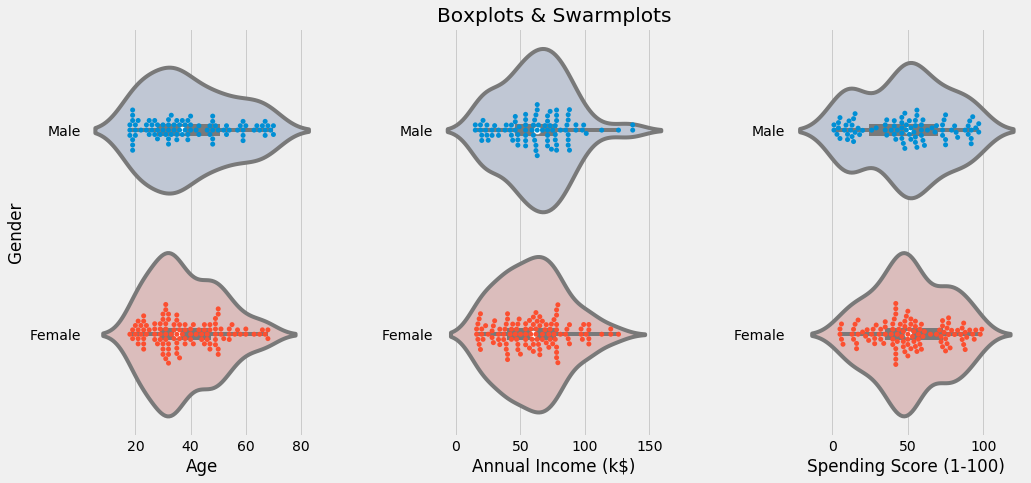

In [42]:
plt.figure(figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [40]:
# Age & spending Score
x1 = df[['Age', 'Spending Score (1-100)']]
inertia = list()
for n in range(1,11):
    algorithm = (KMeans(n_clusters = n, random_state = 111, algorithm = 'elkan'))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

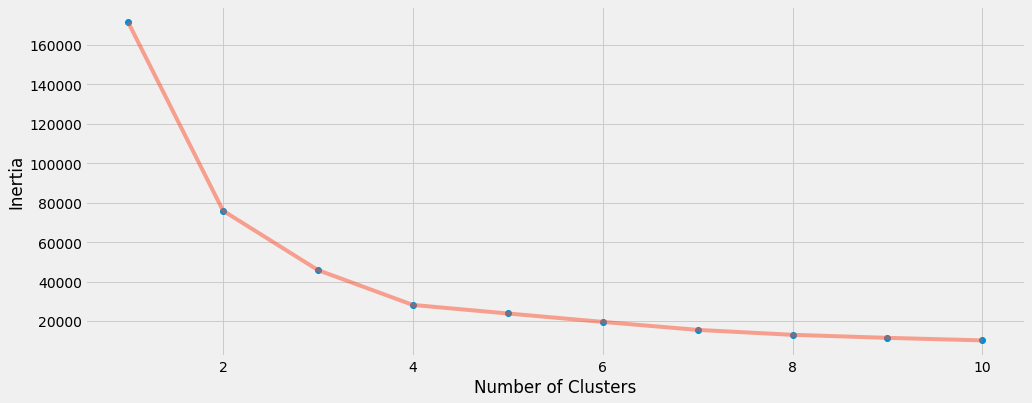

In [46]:
plt.figure(figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = .5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [50]:
algorithm = (KMeans(n_clusters = 4, random_state = 111, algorithm = 'elkan'))
algorithm.fit(x1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [103]:
h = 0.02
x_min, x_max = x1.iloc[:,0].min() - 1, x1.iloc[:,0].max() + 1
y_min, y_max = x1.iloc[:,1].min() - 1, x1.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

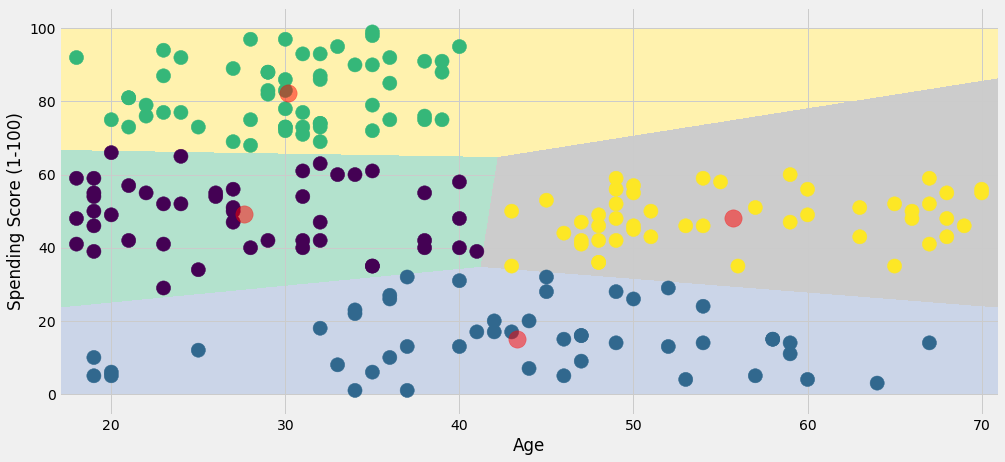

In [98]:
plt.figure(figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [106]:
# Age & Annual Income (k$) & Spending Score (1-100)
x2 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']]
inertia = list()
for n in range(1,11):
    algorithm = (KMeans(n_clusters = n, random_state = 111, algorithm = 'elkan'))
    algorithm.fit(x2)
    inertia.append(algorithm.inertia_)

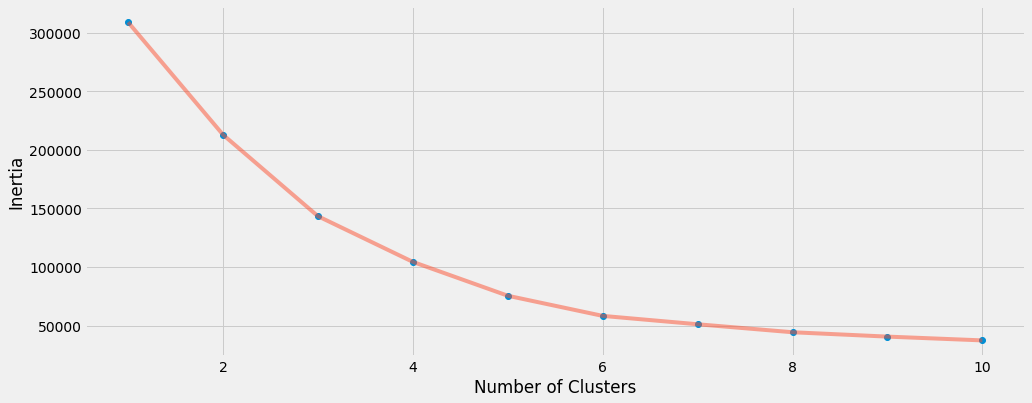

In [107]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [109]:
algorithm = (KMeans(n_clusters = 6, random_state= 111, algorithm='elkan'))
algorithm.fit(x2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [114]:
df['label2'] = labels2
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode= 'markers',
    marker=dict(color = df['label2'], size = 20, line = dict(color = df['label2'], width = 12), opacity = .8)
)

data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)